In [2]:
import warnings

warnings.filterwarnings(action='ignore')

## 3. 평가 (147p)

### 분류의 성능 평가 지표
1. 정확도(Accuracy)

2. 오차행렬(Confusion Matrix)

3. 정밀도(Precision)

4. 재현율(Recall)

5. F1 스코어

6. ROC AUC

이진 분류의 경우에는 데이터의 구성에 따라 ML 모델의 성능을 왜곡할 수 있기 때문에 정확도 수치 하나만 가지고 성능을 평가하지 않는다.

타이타닉의 경우에는, 단지 성별 조건 하나만 가지고 결정하는 별거 아닌 알고리즘도 높은 정확도를 나타내는 상황이 발생한다.

### BaseEstimator
Costomized 형태의 Estimator를 개발자가 생성할 수 있게 됨

In [7]:
## 단순히 Sex가 1이면 0, 그렇지 않으면 1로 예측하는 매우 단순한 Classifier
from sklearn.base import BaseEstimator
import numpy as np

class MyDummyClassifier(BaseEstimator):
    # fit() 메서드는 아무것도 학습하지 않음
    def fit(self, X, y=None):
        pass
    
    # predict() 메서드는 단순히 Sex에 따라 0과 1을 반환함
    def predict(self, X):
        # 입력 값으로 들어오는 X 데이터 세트의 크기만큼 모두 0으로 만들어서 변환
        pred = np.zeros((X.shape[0], 1))
        
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1: pred[i] = 0
            else: pred[i] = 1
                
        return pred

In [8]:
np.zeros((10, 1))

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

### MyDummyClassifier를 이용한 타이타닉 생존자 예측

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [10]:
titanic = pd.read_csv('C:/Users/user/seaborn-data/titanic_train_kaggle.csv')

encoder = LabelEncoder()
encoder.fit(titanic['Sex'])
titanic['Sex'] = encoder.transform(titanic['Sex'])

sel = titanic.columns.drop('Survived')

X = titanic[sel]
y = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=0)

# Dummy를 이용해 학습-예측-평가 수행
dummy = MyDummyClassifier()
dummy.fit(X_train, y_train)
pred = dummy.predict(X_test)

accuracy = accuracy_score(y_test, pred)
print(round(accuracy, 3))

0.788


### 오차 행렬
정확도(accuracy)가 불균형한 레이블 데이터 세트에서 가지는 분류 평가 지표로서 한계점을 극복하기 위해 여러 가지 분류 지표와 함께 적용해야 함.

-> 일반적으로 불균형한 레이블 클래스에서 적은 수의 결과 값에 Positive(1)를 설정함.

In [11]:
from sklearn.metrics import confusion_matrix

In [12]:
confusion_matrix(y_test, pred)

array([[92, 18],
       [20, 49]], dtype=int64)

=> 1이라고 예측한 것 중 맞은게 49개, 틀린게 18개

=> 0이라고 예측한 것 중 맞은게 82개, 틀린게 20개

In [13]:
y_test.value_counts()

0    110
1     69
Name: Survived, dtype: int64

confusion matrix : 오차행렬

accuracy : 정확도

precision : 정밀도

recall : 재현율


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred) 
    
    print('오차행렬\n', confusion)
    print('정확도 : {0:.3f}, 정밀도 : {1:.3f}, 재현율 : {2:.3f}'
          .format(accuracy, precision, recall))

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

titanic = pd.read_csv('C:/Users/user/seaborn-data/titanic_train_kaggle.csv')

X = titanic[['Pclass', 'SibSp', 'Parch']]
y = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

get_clf_eval(y_test, pred)

오차행렬
 [[97 21]
 [30 31]]
정확도 : 0.715, 정밀도 : 0.596, 재현율 : 0.508


In [16]:
### [ Negative확률 : Positive확률 ]
lr_clf.predict_proba(X_test)

array([[0.76791226, 0.23208774],
       [0.74856135, 0.25143865],
       [0.74856135, 0.25143865],
       [0.5617484 , 0.4382516 ],
       [0.61288906, 0.38711094],
       [0.5617484 , 0.4382516 ],
       [0.74856135, 0.25143865],
       [0.74856135, 0.25143865],
       [0.58755495, 0.41244505],
       [0.49667805, 0.50332195],
       [0.5617484 , 0.4382516 ],
       [0.76791226, 0.23208774],
       [0.74856135, 0.25143865],
       [0.74856135, 0.25143865],
       [0.35561852, 0.64438148],
       [0.74856135, 0.25143865],
       [0.76791226, 0.23208774],
       [0.5617484 , 0.4382516 ],
       [0.38017007, 0.61982993],
       [0.63826838, 0.36173162],
       [0.5617484 , 0.4382516 ],
       [0.32073952, 0.67926048],
       [0.74856135, 0.25143865],
       [0.74856135, 0.25143865],
       [0.74856135, 0.25143865],
       [0.5617484 , 0.4382516 ],
       [0.5617484 , 0.4382516 ],
       [0.66227796, 0.33772204],
       [0.5617484 , 0.4382516 ],
       [0.38017007, 0.61982993],
       [0.

In [17]:
lr_clf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1], dtype=int64)

### 샘플 threshold(임계값) 별 정밀도와 재현율 출력

precision_recall_curve()

In [22]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 때의 예측확률을 추출
pred_proba_class = lr_clf.predict_proba(X_test)[:, 1]

# 실제값 데이터 세트와 레이블 값이 1일 때의 예측확률을 precision_recall_curve의 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class)
print('반환된 분류 결정 임곗값 배열의 shape :', thresholds.shape)

# 반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임계값을 15step으로 추출
thr_index = np.arange(0, thresholds.shape[0], 2)
print('샘플 추출을 위한 임계값 배열의 index 10개 :', thr_index)
print('샘플용 10개의 임계값 :', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값 별 정밀도 :', np.round(precisions[thr_index], 3))
print('샘플 임계값 별 재현율 :', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 shape : (28,)
샘플 추출을 위한 임계값 배열의 index 10개 : [ 0  2  4  6  8 10 12 14 16 18 20 22 24 26]
샘플용 10개의 임계값 : [0.23 0.25 0.27 0.29 0.31 0.36 0.4  0.44 0.48 0.53 0.57 0.62 0.68 0.7 ]
샘플 임계값 별 정밀도 : [0.349 0.362 0.447 0.469 0.462 0.478 0.465 0.494 0.604 0.592 0.622 0.61
 0.778 1.   ]
샘플 임계값 별 재현율 : [1.    0.967 0.754 0.738 0.705 0.705 0.656 0.639 0.525 0.475 0.459 0.41
 0.115 0.082]


-> 임계값이 커질수록 정밀도는 증가하고 재현율은 감소한다.

In [23]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

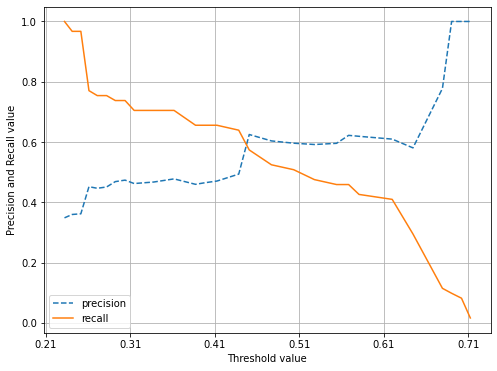

In [25]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold 값으로, Y축은 정밀도, 재현율 값으로 각각 plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6), facecolor='white')
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    # threshold 값 X 축의 Scale을 0.1단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

### F1 스코어

F1 스코어는 정밀도와 재현율이 어느 한 쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가짐.

```python
from sklearn.metrics import f1_score
```

### ROC 곡선과 AUC

ROC 곡선은 FPR(False Positive Rate)이 변할 때 TPR(재현율/민감도)이 어떻게 변하는지 나타내는 곡선.

TNR : 특이성 ( TN / (FP + TN) )

FPR : ROC 곡선의 X 축  ( FP / (FP + TN) )  =  1 - TNR

분류의 성능 지표로 사용되는 것은 ROC 면적에 기반한 AUC(Area Under Curve) 값으로 결정.

AUC는 1에 가까울 수록 좋은 수치. 

AUC 수치가 커지려면 FPR이 작은 상태에서 얼마나 큰 TPR을 얻을 수 있느냐가 관건.